In [1]:
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Flatten, Activation, MaxPooling2D, GlobalMaxPooling2D
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, Adamax, Adadelta, Adagrad, RMSprop

Using TensorFlow backend.


# Importation des images

## Création d'une fonction pour scanner un répertoire

In [2]:
def scan_size(path_im):
    images = {}
    for path in path_im[:5000]:
        # récupération nom de l'image
        im_name = os.path.basename(path)
        
        # récupération des images
        img = cv2.imread(path)
        images[int(im_name[:-4])] = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    return images

In [3]:
im_path = glob.glob('../../../images_training_rev1_resize_black/*.jpg')

In [4]:
images = scan_size(im_path)

In [5]:
images_id = list(images.keys())

## Récupération des outputs correspondants aux images chargées

In [6]:
Y_trainfull = pd.read_csv('./csv/max_benchmark.csv', index_col=0)

In [7]:
Y_trainfull = Y_trainfull.loc[images_id, :]
Y_trainfull

,shape_Class1.1,shape_Class1.2,shape_Class1.3
GalaxyID,,,
100008,0,1,0
100023,0,1,0
100078,1,0,0
100090,1,0,0
100122,1,0,0
...,...,...,...
182956,0,1,0
182961,0,1,0
182971,0,1,0


In [72]:
len(images)

5000

## Aperçu des classes de galaxies

In [8]:
Y_trainfull.sum()

shape_Class1.1    2209
shape_Class1.2    2791
shape_Class1.3       0
dtype: int64

# Séparation des données en ensembles d'entraînement et de validation

In [9]:
X_train_id, x_val_id, Y_train, y_val = train_test_split(images_id, Y_trainfull, test_size=0.2, random_state=15)

In [10]:
print(len(X_train_id))
print(len(Y_train))
print(len(x_val_id))
print(len(y_val))

4000
4000
1000
1000


In [11]:
def images_from_id(images_id, images):
    images_selected = []
    
    for image_id in images_id:
        images_selected += [images[image_id]]
    
    return images_selected

In [12]:
X_train = images_from_id(X_train_id, images)
x_val = images_from_id(x_val_id, images)

In [13]:
print(len(X_train))
X_train[0].shape

4000


(66, 66, 3)

In [14]:
X_train = np.array(X_train)

In [15]:
x_val = np.array(x_val)

# Création du modèle type CNN

In [74]:
model2 = Sequential()
model2.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(66,66,3)))
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(15, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model2.add(Flatten())
model2.add(Dense(3, activation='softmax'))

loss = 'categorical_crossentropy'
LEARNING_RATE = 0.003
EPOCHS = 100

model2.compile(loss=loss,
               optimizer=Adam(lr=LEARNING_RATE), # SGD(lr=LEARNING_RATE)
               metrics=['accuracy'])

history = model2.fit(X_train,
                     Y_train,
                     epochs=EPOCHS,
                     validation_data=(x_val, y_val),
                     batch_size=X_train.shape[0])

Train on 4000 samples, validate on 1000 samples
Epoch 1/100
4000/4000 [==============================] - 5s 1ms/step - loss: 3.2992 - accuracy: 0.4647 - val_loss: 23.6408 - val_accuracy: 0.5890
Epoch 2/100
4000/4000 [==============================] - 5s 1ms/step - loss: 25.8628 - accuracy: 0.5505 - val_loss: 12.8300 - val_accuracy: 0.5890
Epoch 3/100
4000/4000 [==============================] - 5s 1ms/step - loss: 14.0178 - accuracy: 0.5505 - val_loss: 4.4857 - val_accuracy: 0.5890
Epoch 4/100
4000/4000 [==============================] - 6s 2ms/step - loss: 4.8639 - accuracy: 0.5505 - val_loss: 0.9969 - val_accuracy: 0.5310
Epoch 5/100
4000/4000 [==============================] - 6s 1ms/step - loss: 0.9956 - accuracy: 0.5290 - val_loss: 2.5248 - val_accuracy: 0.4150
Epoch 6/100
4000/4000 [==============================] - 6s 2ms/step - loss: 2.3785 - accuracy: 0.4507 - val_loss: 1.8028 - val_accuracy: 0.4100
Epoch 7/100
4000/4000 [==============================] - 7s 2ms/step - loss: 1

Epoch 57/100
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4681 - accuracy: 0.7875 - val_loss: 0.5011 - val_accuracy: 0.7740
Epoch 58/100
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4565 - accuracy: 0.8010 - val_loss: 0.5027 - val_accuracy: 0.7730
Epoch 59/100
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4588 - accuracy: 0.7987 - val_loss: 0.5160 - val_accuracy: 0.7650
Epoch 60/100
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4592 - accuracy: 0.7962 - val_loss: 0.5031 - val_accuracy: 0.7710
Epoch 61/100
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4501 - accuracy: 0.8065 - val_loss: 0.5043 - val_accuracy: 0.7720
Epoch 62/100
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4546 - accuracy: 0.8010 - val_loss: 0.5132 - val_accuracy: 0.7660
Epoch 63/100
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4518 - accuracy: 0.7993 - val_loss: 0.5044 -

In [75]:
score = round(model2.evaluate(x_val, y_val, verbose=0)[1]*100,1)
print(score, "%")

76.7 %


In [76]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 64, 64, 10)        280       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 32, 32, 10)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 30, 30, 15)        1365      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 15, 15, 15)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 13, 13, 20)        2720      
_________________________________________________________________
flatten_11 (Flatten)         (None, 3380)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)               

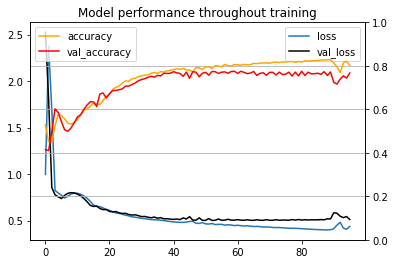

In [77]:
import pandas as pd
%matplotlib inline

fig, ax1 = plt.subplots()

plt.plot(history.history['loss'][4:], label='loss')
plt.plot(history.history['val_loss'][4:], c = 'black', label='val_loss')
plt.legend()

ax2 = ax1.twinx()
plt.plot(history.history['accuracy'][4:], c = 'orange', label='accuracy')
plt.plot(history.history['val_accuracy'][4:], c = 'red', label='val_accuracy')
plt.ylim(bottom=0, top=1)
plt.legend()

plt.grid(True)
plt.title('Model performance throughout training')
plt.xlabel('epoch');

In [78]:
y_predict = model2.predict(x_val)

In [80]:
y_predict = pd.DataFrame(y_predict)
y_predict.columns = ['0','1','2']
y_predict.head()

,0,1,2
0,0.029647,0.970353,4.551151e-10
1,0.971898,0.028102,9.618358e-09
2,0.499006,0.500994,4.944083e-09
3,0.937416,0.062584,8.212804e-15
4,0.764540,0.235460,4.662546e-10


In [81]:
for i in range(0, 3):
    y_predict.loc[y_predict[str(i)] == y_predict.agg(func=max, axis=1), str(i)] = 1
    y_predict.loc[y_predict[str(i)] < 1, str(i)] = 0

y_predict.head()

,0,1,2
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [99]:
y_val_mod = pd.DataFrame(y_val)
y_val_mod.columns = ['0','1','2']
y_val_mod.head()

,0,1,2
GalaxyID,,,
147619,0,1,0
116386,1,0,0
156246,0,1,0
175205,1,0,0
169850,1,0,0


In [100]:
y_val_mod.sum()

0    411
1    589
2      0
dtype: int64

In [84]:
y_val_mod = np.array(y_val_mod)
y_predict = np.array(y_predict)

In [85]:
def Y_transform(Y_train):
    Y_output = []
    for line in range(len(Y_train)):
        for col in range(3):
            value = str(int(Y_train[line][col]))
            if value == '1':
                Y_output += [str(col)]

    return Y_output

In [86]:
y_val_mod = Y_transform(y_val_mod)
y_predict = Y_transform(y_predict)

In [87]:
y_val_mod[:10]

['1', '0', '1', '0', '0', '0', '1', '0', '0', '1']

In [88]:
y_predict[:10]

['1', '0', '1', '0', '0', '1', '1', '0', '0', '1']

[[301 123]
 [110 466]]


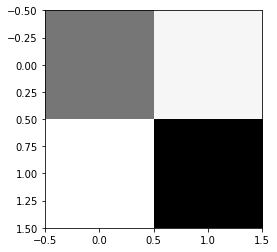

In [89]:
conf_matrix = metrics.confusion_matrix(y_predict, y_val_mod)
print(conf_matrix)
plt.imshow(conf_matrix, cmap='binary');

# Sylvia model

In [115]:
model = Sequential([
  Conv2D(8, (3,3), strides=1, input_shape=(66, 66, 3), activation='elu'),
  #Conv2D(8, (3,3), strides=1, input_shape=(64, 64, 3), activation='elu'),
  MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  Dropout(0.4),

  Conv2D(16, (3,3), strides=1, input_shape=(66, 66, 3), activation='elu'),
  #Conv2D(16, (3,3), strides=1, input_shape=(64, 64, 3), activation='elu'),
  MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  Dropout(0.4),
    
  Conv2D(32, (3,3), strides=1, input_shape=(66, 66, 3), activation='elu'),
  #Conv2D(32, (3,3), strides=1, input_shape=(64, 64, 3), activation='elu'),
  MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  Dropout(0.4),
  
  Conv2D(32, (1,1), strides=1, input_shape=(66, 66, 3), activation='elu'),
  Dropout(0.4),  
    
  
  Flatten(),
  Dense(3, activation='softmax'),  #3= category for the three type of images
    
])

loss = 'categorical_crossentropy'
LEARNING_RATE = 0.01
EPOCHS = 100

model.compile(loss=loss,
               optimizer=Adam(lr=LEARNING_RATE), # SGD(lr=LEARNING_RATE)
               metrics=['accuracy'])

history = model.fit(X_train,
                     Y_train,
                     epochs=EPOCHS,
                     validation_data=(x_val, y_val),
                     batch_size=X_train.shape[0])

Train on 4000 samples, validate on 1000 samples
Epoch 1/100
4000/4000 [==============================] - 4s 1ms/step - loss: 82.6352 - accuracy: 0.3128 - val_loss: 17.6288 - val_accuracy: 0.5890
Epoch 2/100
4000/4000 [==============================] - 4s 909us/step - loss: 120.6320 - accuracy: 0.5505 - val_loss: 1.0369 - val_accuracy: 0.6480
Epoch 3/100
4000/4000 [==============================] - 4s 906us/step - loss: 19.7363 - accuracy: 0.5523 - val_loss: 8.3642 - val_accuracy: 0.5920
Epoch 4/100
4000/4000 [==============================] - 4s 906us/step - loss: 4.8998 - accuracy: 0.5625 - val_loss: 8.8104 - val_accuracy: 0.5930
Epoch 5/100
4000/4000 [==============================] - 4s 905us/step - loss: 3.0762 - accuracy: 0.5405 - val_loss: 8.4351 - val_accuracy: 0.5920
Epoch 6/100
4000/4000 [==============================] - 4s 914us/step - loss: 4.2078 - accuracy: 0.4868 - val_loss: 8.9730 - val_accuracy: 0.5890
Epoch 7/100
4000/4000 [==============================] - 4s 902us/s

4000/4000 [==============================] - 4s 941us/step - loss: 0.8548 - accuracy: 0.6158 - val_loss: 1.1964 - val_accuracy: 0.5770
Epoch 57/100
4000/4000 [==============================] - 4s 933us/step - loss: 0.8498 - accuracy: 0.6233 - val_loss: 1.2050 - val_accuracy: 0.5700
Epoch 58/100
4000/4000 [==============================] - 4s 936us/step - loss: 0.8354 - accuracy: 0.6300 - val_loss: 1.1119 - val_accuracy: 0.5890
Epoch 59/100
4000/4000 [==============================] - 4s 926us/step - loss: 0.8236 - accuracy: 0.6315 - val_loss: 1.0434 - val_accuracy: 0.6000
Epoch 60/100
4000/4000 [==============================] - 4s 943us/step - loss: 0.8278 - accuracy: 0.6208 - val_loss: 1.0454 - val_accuracy: 0.5980
Epoch 61/100
4000/4000 [==============================] - 4s 930us/step - loss: 0.8158 - accuracy: 0.6205 - val_loss: 1.0935 - val_accuracy: 0.5860
Epoch 62/100
4000/4000 [==============================] - 4s 952us/step - loss: 0.8366 - accuracy: 0.6205 - val_loss: 1.0995 

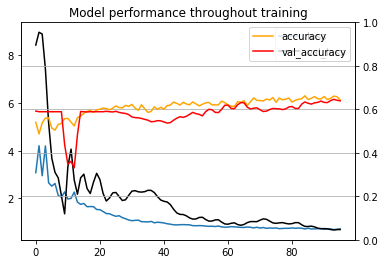

In [116]:
import pandas as pd
%matplotlib inline

fig, ax1 = plt.subplots()

plt.plot(history.history['loss'][4:], label='loss')
plt.plot(history.history['val_loss'][4:], c = 'black', label='val_loss')
plt.legend()

ax2 = ax1.twinx()
plt.plot(history.history['accuracy'][4:], c = 'orange', label='accuracy')
plt.plot(history.history['val_accuracy'][4:], c = 'red', label='val_accuracy')
plt.ylim(bottom=0, top=1)
plt.legend()

plt.grid(True)
plt.title('Model performance throughout training')
plt.xlabel('epoch');